In [ ]:
%pip install tensorflow scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
OPTIMIZER = "adam"
LOSS = "binary_crossentropy"
METRICS = ["accuracy", "mae"]
EPOCHS = 25
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

In [6]:
df = pd.read_csv("data/clean.csv", index_col=0).drop(
    columns=["Unnamed: 6"], errors="ignore"
)
df.sample(2)

,log_duration,until_working_time,avg_star,post_finish_percentage,avg_duration_minutes_finished,ป้าย,ความสะอาด,แสงสว่าง,สอบถาม,ร้องเรียน,...,กีดขวาง,สายไฟ,PM2.5,น้ำท่วม,ทางเท้า,สัตว์จรจัด,ความปลอดภัย,ห้องน้ำ,ป้ายจราจร,Others
duration,,,,,,,,,,,,,,,,,,,,,
26044.0,10.167581,180,3.98,80.15,95756.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5867.0,8.677269,1441,3.80,83.37,45202.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
df.shape

(645700, 48)

In [5]:
df.columns

Index(['ticket_id', 'type', 'organization', 'comment', 'photo', 'photo_after',
       'coords', 'address', 'subdistrict', 'district', 'province', 'timestamp',
       'state', 'star', 'count_reopen', 'last_activity', 'duration',
       'Unnamed: 18', 'กีดขวาง', 'ความสะอาด', 'ร้องเรียน', 'คนจรจัด', 'สายไฟ',
       'ป้าย', 'ท่อระบายน้ำ', 'PM2.5', 'เสนอแนะ', 'สัตว์จรจัด', 'ถนน', 'สะพาน',
       'ความปลอดภัย', 'น้ำท่วม', 'สอบถาม', 'คลอง', 'ต้นไม้', 'ทางเท้า',
       'ป้ายจราจร', 'จราจร', 'แสงสว่าง', 'ห้องน้ำ', 'การเดินทาง', 'เสียงรบกวน',
       'Others', 'until_working_time', 'orgs_list', 'avg_star',
       'post_finish_percentage', 'avg_duration_minutes_finished'],
      dtype='object')

In [ ]:
df["until_working_time"].value_counts()

In [ ]:
df["avg_duration_minutes_finished"].describe()

In [28]:
X = df.drop(columns=["log_duration"])
y = df["log_duration"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=699
)

In [39]:
OPTIMIZER = "adam"
LOSS = "mse"
METRICS = ["mae", "mse"]
EPOCHS = 100
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(X.shape[1],)),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(8, activation="relu"),
        Dense(1),
    ]
)

model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12153/12153 ━━━━━━━━━━━━━━━━━━━━ 6s 449us/step - loss: 4.8419 - mae: 1.6934 - mse: 4.8419 - val_loss: 3.4244 - val_mae: 1.5212 - val_mse: 3.4244
Epoch 2/100
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 430us/step - loss: 3.3863 - mae: 1.5235 - mse: 3.3863 - val_loss: 3.3390 - val_mae: 1.5219 - val_mse: 3.3390
Epoch 3/100
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 433us/step - loss: 3.3030 - mae: 1.5018 - mse: 3.3030 - val_loss: 3.2658 - val_mae: 1.4885 - val_mse: 3.2658
Epoch 4/100
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 438us/step - loss: 3.2599 - mae: 1.4918 - mse: 3.2599 - val_loss: 3.2358 - val_mae: 1.4845 - val_mse: 3.2358
Epoch 5/100
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 440us/step - loss: 3.2297 - mae: 1.4830 - mse: 3.2297 - val_loss: 3.2330 - val_mae: 1.4858 - val_mse: 3.2330
Epoch 6/100
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 430us/step - loss: 3.2151 - mae: 1.4790 - mse: 3.2151 - val_loss: 3.2058 - val_mae: 1.4732 - val_mse: 3.2058
Epoch 7/100
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 443us/step - loss: 3.2

In [40]:
loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 280us/step - loss: 3.1398 - mae: 1.4506 - mse: 3.1398
Loss: 3.141171932220459
MAE: 1.4519087076187134
MSE: 3.141171932220459


3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step


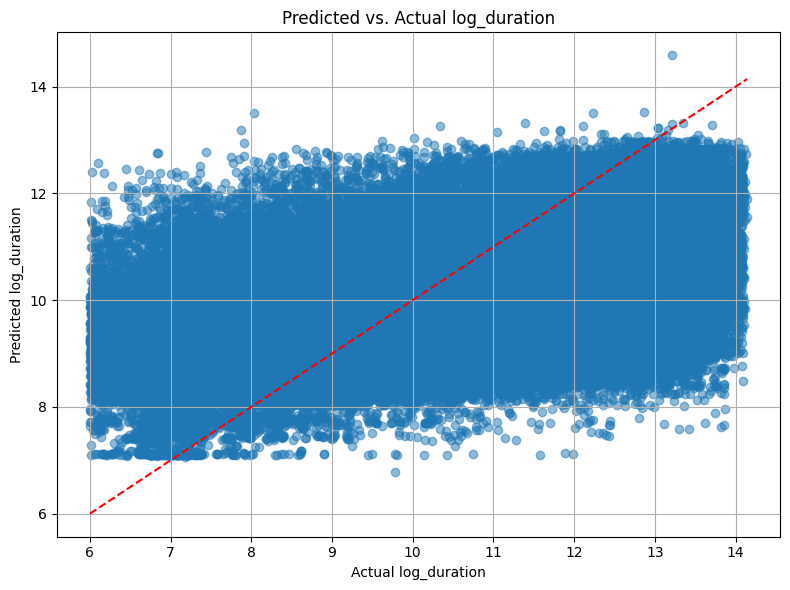

In [41]:
y_pred = model.predict(X_test).flatten()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual log_duration")
plt.ylabel("Predicted log_duration")
plt.title("Predicted vs. Actual log_duration")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # y=x line
plt.grid(True)
plt.tight_layout()
plt.show()

3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step


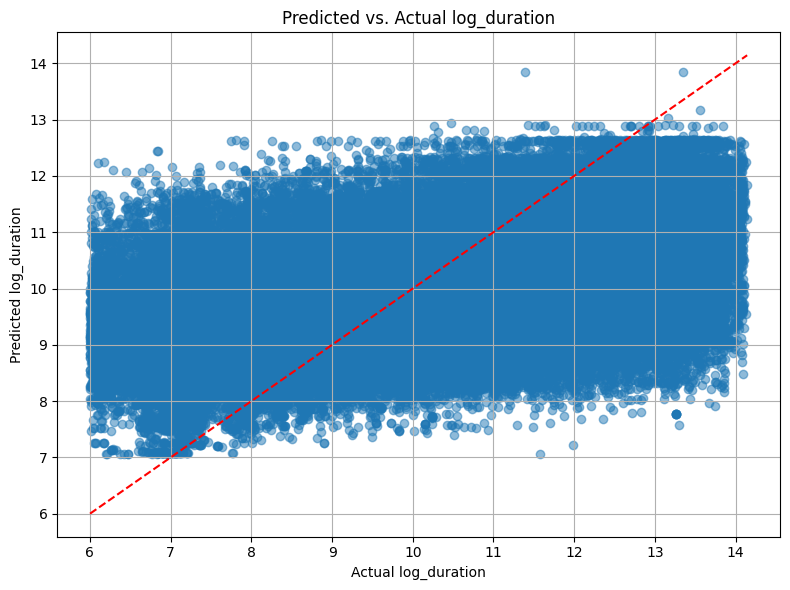

In [32]:
y_pred = model.predict(X_test).flatten()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual log_duration")
plt.ylabel("Predicted log_duration")
plt.title("Predicted vs. Actual log_duration")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # y=x line
plt.grid(True)
plt.tight_layout()
plt.show()